In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Cardiotocographic.csv')

In [5]:
df.shape

(2126, 14)

In [6]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [63]:
# Fill missing values with median (since numerical)
df = df.fillna(df.median())

# Verify no missing values left
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [64]:
df.duplicated().sum()

np.int64(2)

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.duplicated().sum()

np.int64(0)

In [67]:
df.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [68]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


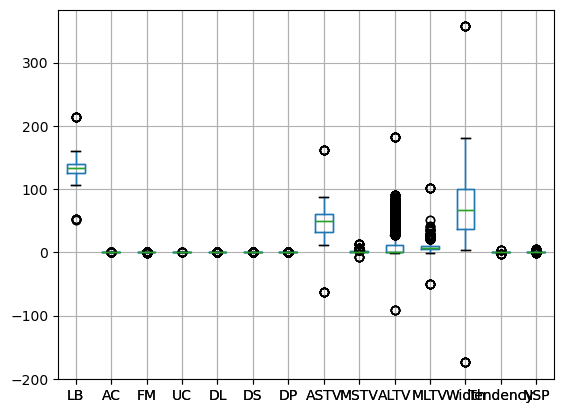

In [70]:
df.boxplot()
plt.show()

In [71]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.00000,2124.000000,2124.000000,2124.000000
mean,133.338641,0.003205,0.009904,0.004394,0.001897,0.000002,0.000174,47.012459,1.364345,10.295650,8.27184,70.426833,0.313541,1.301783
std,11.212447,0.004374,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.73691,42.728278,0.643417,0.642369
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.70000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.60000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.40000,67.000000,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.80000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.40000,357.000000,3.000000,5.000000


In [72]:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    Lower_extreme=Q1-1.5*IQR
    Upper_extreme=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:Lower_extreme if x<Lower_extreme else Upper_extreme if x>Upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

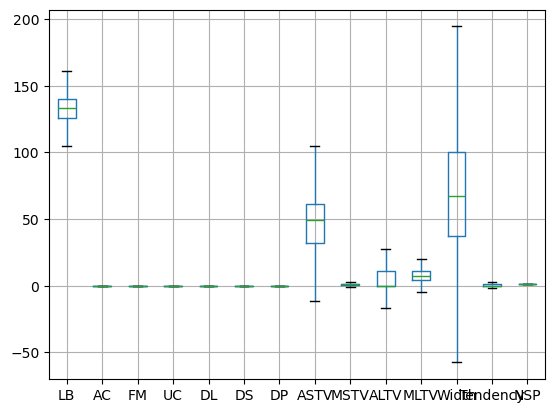

In [73]:
df.boxplot()
plt.show()

In [74]:
a= ["LB","AC","FM","UC","DL","DS","DP","ASTV","MSTV","ALTV","MLTV"]

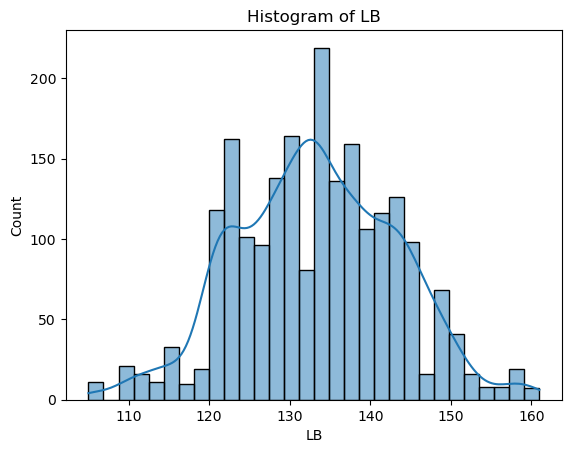

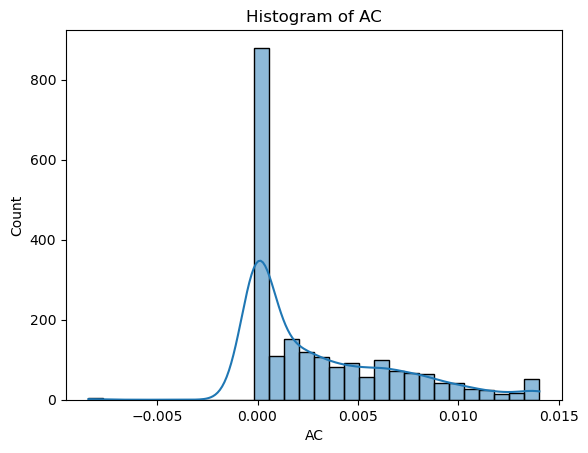

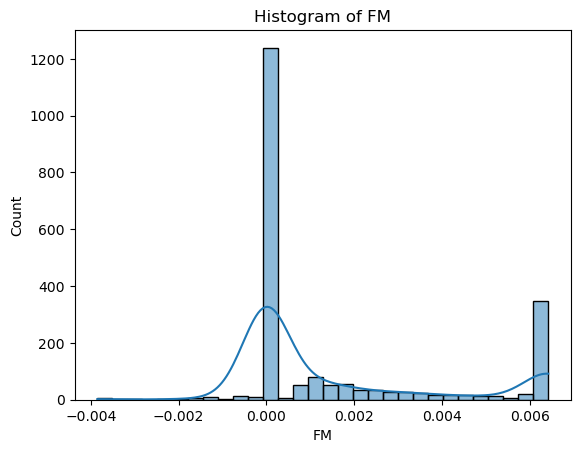

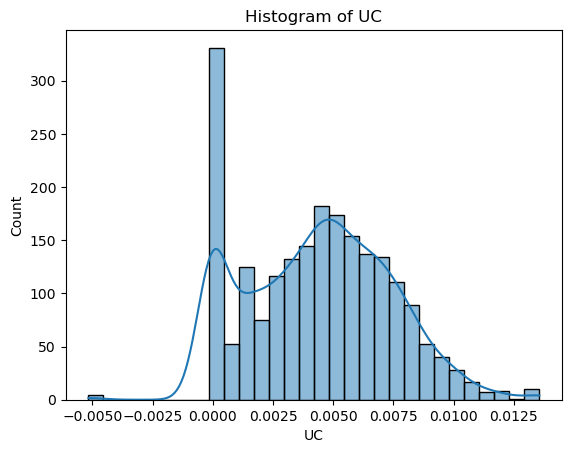

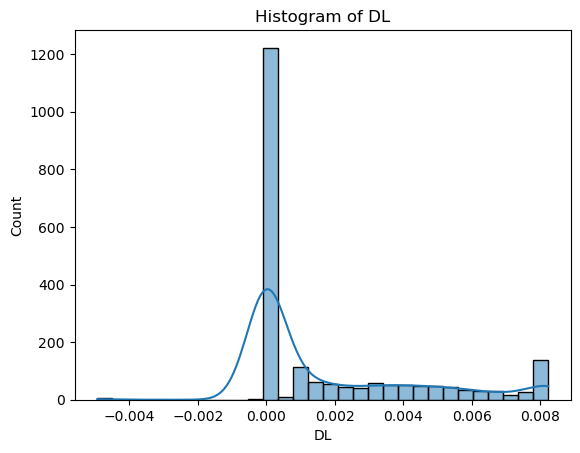

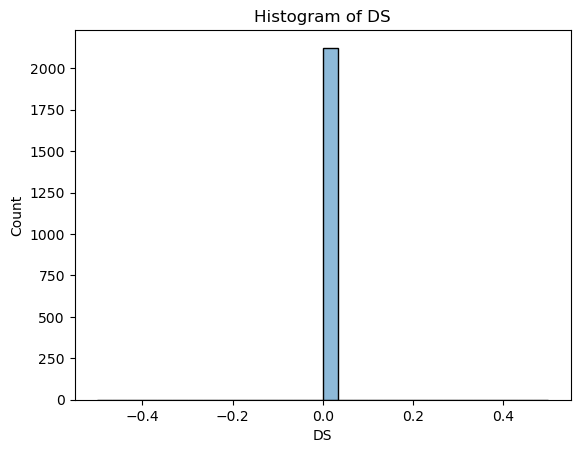

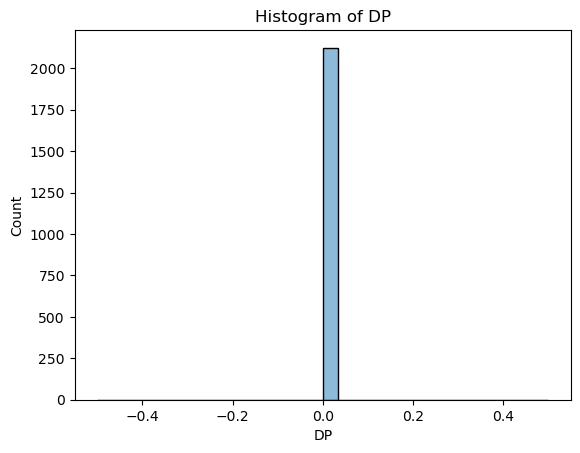

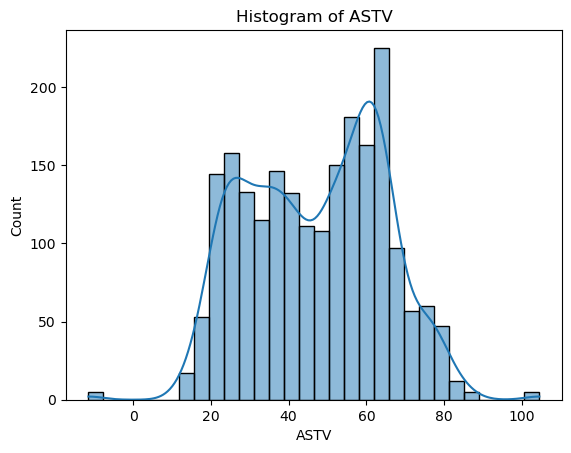

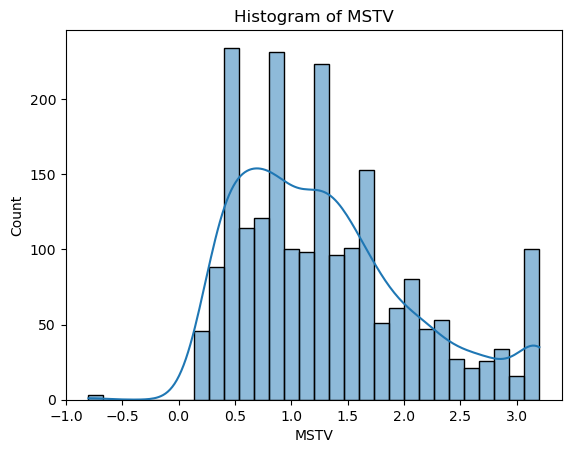

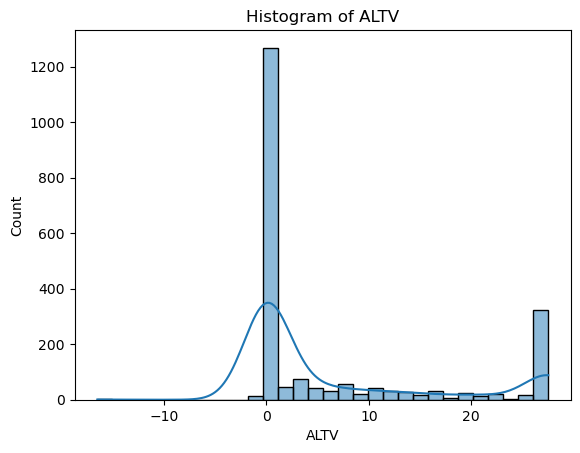

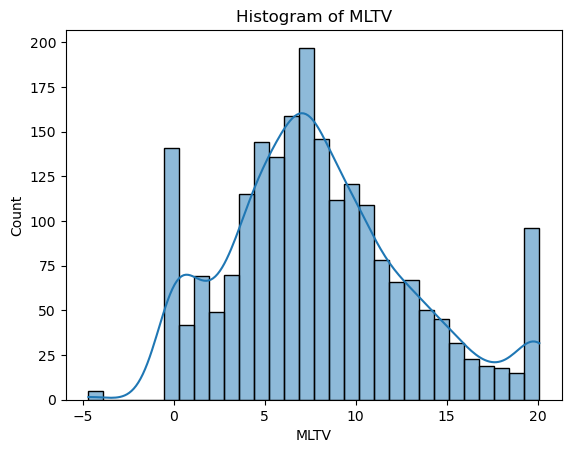

In [75]:
for col in a:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()


In [76]:
cat_df = df.select_dtypes(include=['object'])
print("Categorical columns:", cat_df.columns.tolist())


Categorical columns: []


In [77]:
# so there is no caategorical column to do categorical visual 


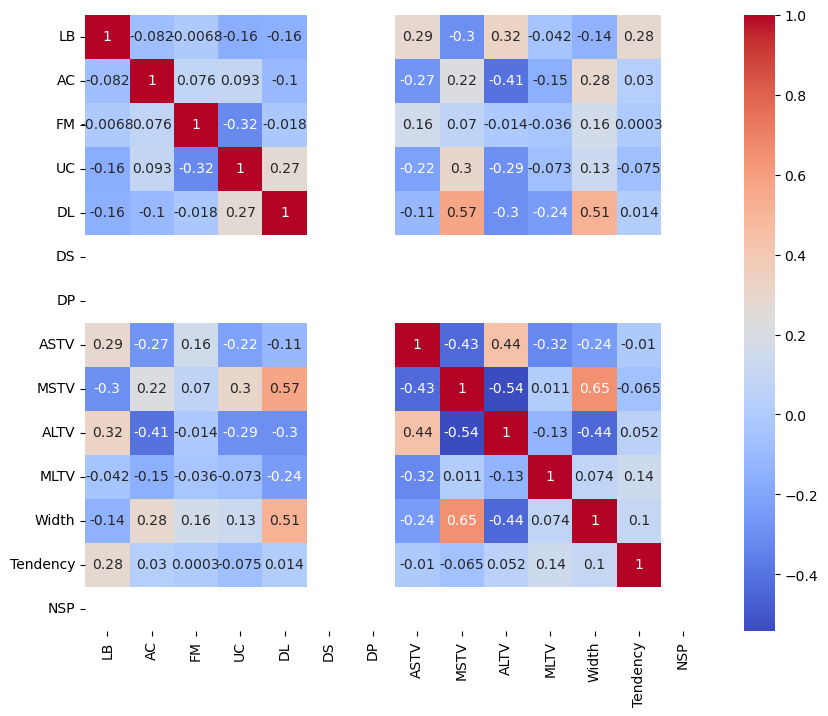

In [78]:
## Correlation 
plt.figure(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr,annot=True, cmap="coolwarm")
plt.show()

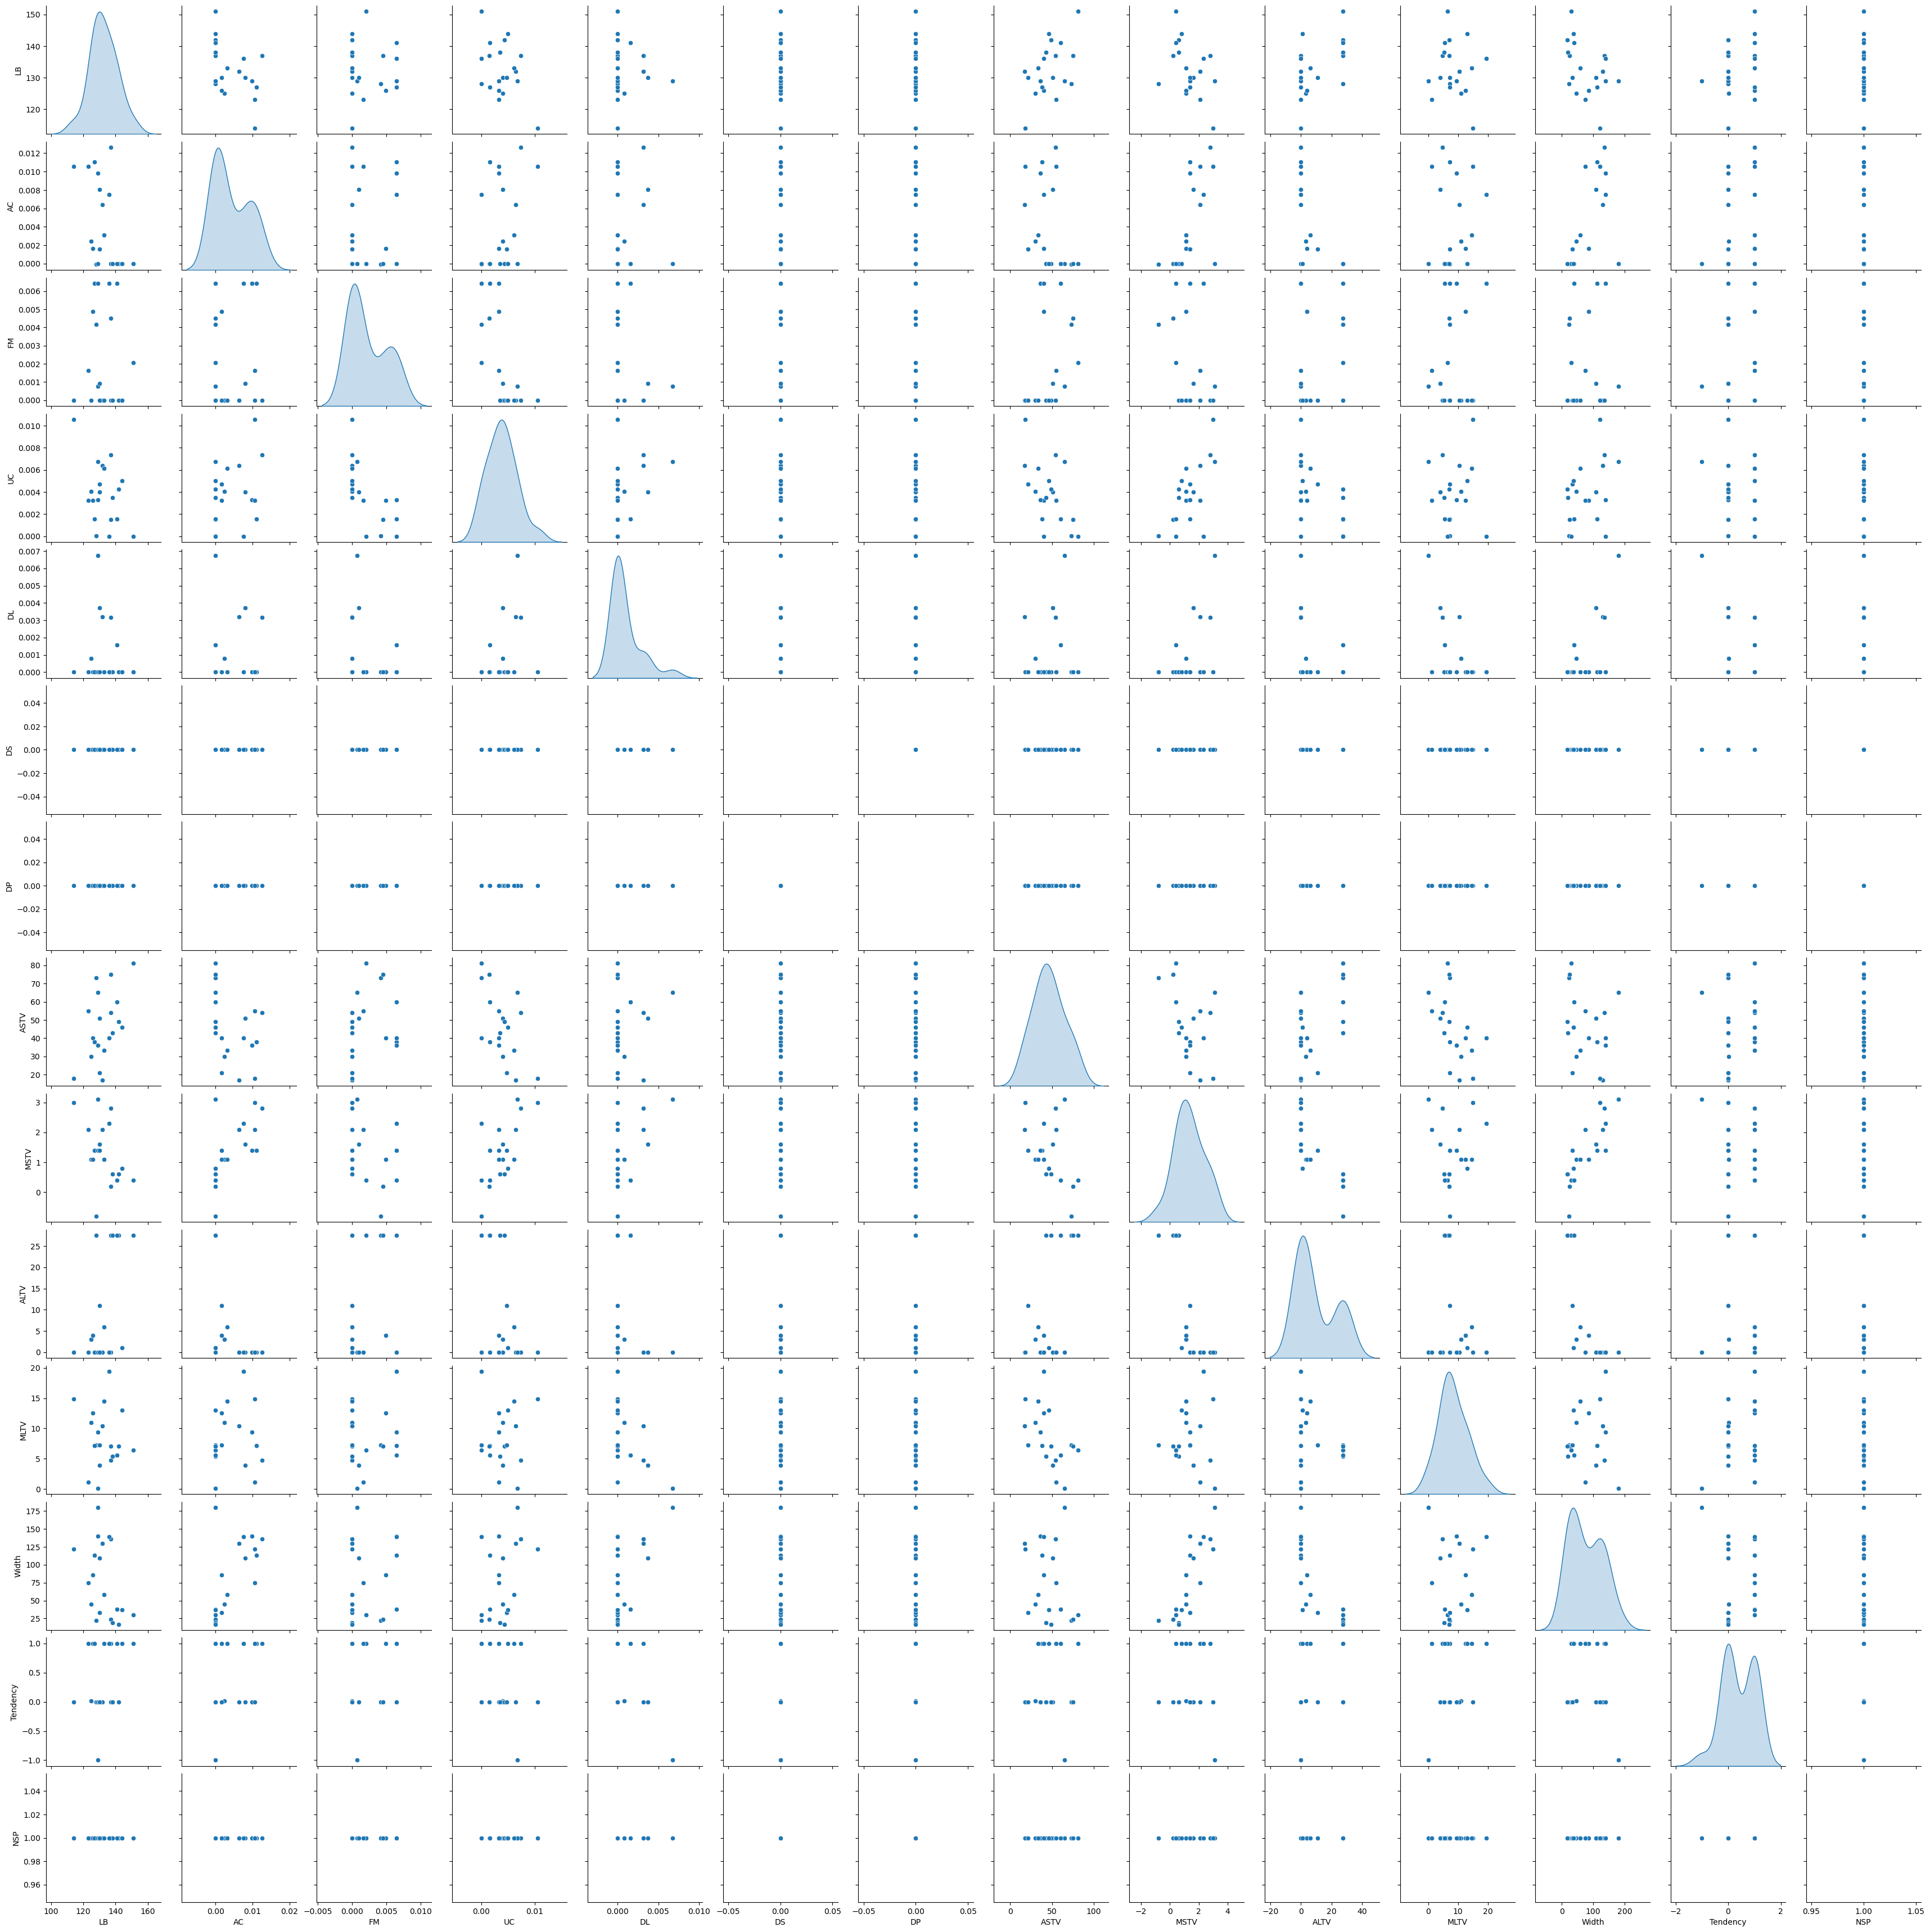

In [79]:
sns.pairplot(df.sample(20), diag_kind="kde")
plt.show()

In [80]:
df.corr()['NSP'].sort_values(ascending=False)

LB         NaN
AC         NaN
FM         NaN
UC         NaN
DL         NaN
DS         NaN
DP         NaN
ASTV       NaN
MSTV       NaN
ALTV       NaN
MLTV       NaN
Width      NaN
Tendency   NaN
NSP        NaN
Name: NSP, dtype: float64